In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
tourismData=pd.read_csv('dataset/train.csv', encoding='latin')
print('Shape before deleting duplicate values:', tourismData.shape)

# Removing duplicate rows if any
tourismData=tourismData.drop_duplicates()
print('Shape After deleting duplicate values:', tourismData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
tourismData.head(10)

Shape before deleting duplicate values: (18506, 20)
Shape After deleting duplicate values: (18506, 20)


Tour_ID age_group               travel_with  total_female  \
0  tour_id1hffseyw     45-64             With Children           0.0   
1  tour_idnacd7zag     25-44               With Spouse           1.0   
2  tour_id62vz7e71       65+               With Spouse           1.0   
3  tour_idrc76tzix     25-44  With Spouse and Children           3.0   
4  tour_idn723m0n9     45-64                     Alone           0.0   
5  tour_id8aylf7ba     25-44               With Spouse           1.0   
6  tour_idvcadicba     25-44               With Spouse           1.0   
7  tour_idfmavssxv     25-44                     Alone           0.0   
8  tour_id8oqlvjwr     18-24                     Alone           1.0   
9  tour_idy0blevrs     45-64               With Spouse           1.0   

   total_male  total_people                         purpose     main_activity  \
0         2.0             2  Visiting Friends and Relatives     Beach Tourism   
1         1.0             2            Leisure and Holidays  Wildlife Tourism   
2         1.0             2            Leisure and Holidays   Widlife Tourism   
3         1.0             4            Leisure and Holidays     Beach Tourism   
4         1.0             1            Leisure and Holidays   Widlife Tourism   
5         1.0             2            Leisure and Holidays   Widlife Tourism   
6         1.0             2            Leisure and Holidays  Wildlife Tourism   
7         1.0             1            Leisure and Holidays  Cultural Tourism   
8         0.0             1            Leisure and Holidays  Cultural Tourism   
9         1.0             2            Leisure and Holidays   Widlife Tourism   

  tour_arrangement package_transport_int package_accomodation package_food  \
0     Package Tour                   Yes                  Yes          Yes   
1     Package Tour                   Yes                  Yes          Yes   
2     Package Tour                   Yes                  Yes          Yes   
3      Independent                    No                   No           No   
4     Package Tour                   Yes                  Yes          Yes   
5     Package Tour                   Yes                  Yes          Yes   
6      Independent                    No                   No           No   
7      Independent                    No                   No           No   
8      Independent                    No                   No           No   
9     Package Tour                   Yes                  Yes           No   

  package_transport_tz package_sightseeing package_guided_tour  \
0                  Yes                  No                  No   
1                  Yes                  No                  No   
2                  Yes                 Yes                 Yes   
3                   No                  No                  No   
4                  Yes                  No                 Yes   
5                   No                  No                  No   
6                   No                  No                  No   
7                   No                  No                  No   
8                   No                  No                  No   
9                  Yes                 Yes                 Yes   

  package_insurance  night_mainland  night_zanzibar first_trip_tz  \
0                No               0               7           Yes   
1                No               0               7           Yes   
2                No               6               6           Yes   
3                No               3               0            No   
4               Yes               7               0           Yes   
5                No              14               7           Yes   
6                No               7               0           Yes   
7                No               4               0           Yes   
8                No              60               0           Yes   
9               Yes               6               

# Looking at the distribution of Target variable

<AxesSubplot:xlabel='cost_category'>

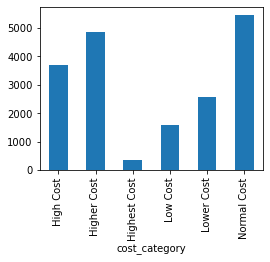

In [2]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=tourismData.groupby('cost_category').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [3]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
tourismData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18506 entries, 0 to 18505
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   age_group              18506 non-null  object 
 2   travel_with            17431 non-null  object 
 3   total_female           18504 non-null  float64
 4   total_male             18500 non-null  float64
 5   total_people           18506 non-null  int64  
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   tour_arrangement       18506 non-null  object 
 9   package_transport_int  18506 non-null  object 
 10  package_accomodation   18506 non-null  object 
 11  package_food           18506 non-null  object 
 12  package_transport_tz   18506 non-null  object 
 13  package_sightseeing    18506 non-null  object 
 14  package_guided_tour    18506 non-null  object 
 15  pa

In [4]:
# Looking at the descriptive statistics of the data
tourismData.describe(include='all')

Tour_ID age_group travel_with  total_female    total_male  \
count             18506     18506       17431  18504.000000  18500.000000   
unique            18506         5           5           NaN           NaN   
top     tour_id1hffseyw     25-44       Alone           NaN           NaN   
freq                  1      9047        7590           NaN           NaN   
mean                NaN       NaN         NaN      0.936230      0.998757   
std                 NaN       NaN         NaN      1.215582      1.173177   
min                 NaN       NaN         NaN      0.000000      0.000000   
25%                 NaN       NaN         NaN      0.000000      1.000000   
50%                 NaN       NaN         NaN      1.000000      1.000000   
75%                 NaN       NaN         NaN      1.000000      1.000000   
max                 NaN       NaN         NaN     49.000000     58.000000   

        total_people               purpose    main_activity tour_arrangement  \
count   18506.000000                 18506            18506            18506   
unique           NaN                     8               10                2   
top              NaN  Leisure and Holidays  Widlife Tourism     Package Tour   
freq             NaN                 11755             5988             9295   
mean        1.934562                   NaN              NaN              NaN   
std         2.008624                   NaN              NaN              NaN   
min         0.000000                   NaN              NaN              NaN   
25%         1.000000                   NaN              NaN              NaN   
50%         2.000000                   NaN              NaN              NaN   
75%         2.000000                   NaN              NaN              NaN   
max        93.000000                   NaN              NaN              NaN   

       package_transport_int package_accomodation package_food  \
count                  18506                18506        18506   
unique                     2                    2            2   
top                       No                   No           No   
freq                   12238                 9541        10143   
mean                     NaN                  NaN          NaN   
std                      NaN                  NaN          NaN   
min                      NaN                  NaN          NaN   
25%                      NaN                  NaN          NaN   
50%                      NaN                  NaN          NaN   
75%                      NaN                  NaN          NaN   
max                      NaN                  NaN          NaN   

       package_transport_tz package_sightseeing package_guided_tour  \
count                 18506               18506               18506   
unique                    2                   2                   2   
top                      No                  No                  No   
freq                  10873               12786               12447   
mean                    NaN                 NaN                 NaN   
std                     NaN                 NaN                 NaN   
min                     NaN                 NaN                 NaN   
25%                     NaN                 NaN                 NaN   
50%                     NaN                 NaN                 NaN   
75%                     NaN                 NaN                 NaN   
max                     NaN                 NaN                 NaN   

       package_insurance  night_mainland  night_zanzibar first_trip_tz  \
count              18506    18506.000000    18506.000000         18506   
unique                 2             NaN             NaN             2   
top                   No             NaN             NaN           Yes   
freq               15809             NaN             NaN         12737   
mean                 NaN        9.141576        2.493516           NaN   
std                  NaN       14.127449

# Removing useless variables from data

In [5]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Tour_ID','purpose','travel_with','purpose','main_activity','tour_arrangement']
tourismData = tourismData.drop(UselessColumns,axis=1)
tourismData.head()

age_group  total_female  total_male  total_people package_transport_int  \
0     45-64           0.0         2.0             2                   Yes   
1     25-44           1.0         1.0             2                   Yes   
2       65+           1.0         1.0             2                   Yes   
3     25-44           3.0         1.0             4                    No   
4     45-64           0.0         1.0             1                   Yes   

  package_accomodation package_food package_transport_tz package_sightseeing  \
0                  Yes          Yes                  Yes                  No   
1                  Yes          Yes                  Yes                  No   
2                  Yes          Yes                  Yes                 Yes   
3                   No           No                   No                  No   
4                  Yes          Yes                  Yes                  No   

  package_guided_tour package_insurance  night_mainland  night_zanzibar  \
0                  No                No               0               7   
1                  No                No               0               7   
2                 Yes                No               6               6   
3                  No                No               3               0   
4                 Yes               Yes               7               0   

  first_trip_tz cost_category  
0           Yes     High Cost  
1           Yes     High Cost  
2           Yes   Higher Cost  
3            No    Lower Cost  
4           Yes   Higher Cost

# Removing Missing Values

In [6]:
# Finding how many missing values are there for each column
tourismData.isnull().sum()

age_group                0
total_female             2
total_male               6
total_people             0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

In [7]:
tourismData = tourismData.dropna()

In [8]:
tourismData.isnull().sum()

age_group                0
total_female             0
total_male               0
total_people             0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

In [9]:
tourismData.shape

(18498, 15)

# label encoding

In [10]:
tourismData.replace({"package_transport_int":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"package_accomodation":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"package_food":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"package_transport_tz":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"package_sightseeing":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"package_guided_tour":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"package_insurance":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"first_trip_tz":{'No':0,'Yes':1}},inplace=True)
tourismData.replace({"travel_with":{'With Children':0,'With Spouse':1,'Alone':2,'With Spouse and Children':3,'With Other Friends/Relatives':4}},inplace=True)
tourismData.replace({"purpose":{'Visiting Friends and Relatives':0,'Leisure and Holidays':1,'Business':2,'Scientific and Academic':3,'Meetings and Conference':4,'Volunteering':5,'Other':6,'Medical':7}},inplace=True)
tourismData.replace({"main_activity":{'Beach Tourism':0,'Wildlife Tourism':1,'Cultural Tourism':2,'Bird Tourism':3,'Hunting Tourism':4,'Conference Tourism':5,'Mountain Climbing':6,'Widlife Tourism':7,'Business':8,'Diving and Sport Fishing':9}},inplace=True)
tourismData.replace({"info_source":{'Friends, relatives':0,'Travel agent, tour operator':1,'Radio, TV, Web':2,'Newspaper, magazines, brochures':3,'Trade fair':4,'Others':5,'Tanzania Mission Abroad':6,'Inflight magazines':7}},inplace=True)
tourismData.replace({"tour_arrangement":{'Package Tour':0,'Independent':1}},inplace=True)

In [11]:
tourismData.head(1234)

age_group  total_female  total_male  total_people  package_transport_int  \
0        45-64           0.0         2.0             2                      1   
1        25-44           1.0         1.0             2                      1   
2          65+           1.0         1.0             2                      1   
3        25-44           3.0         1.0             4                      0   
4        45-64           0.0         1.0             1                      1   
...        ...           ...         ...           ...                    ...   
1229     45-64           1.0         1.0             2                      0   
1230     25-44           1.0         1.0             2                      0   
1231     45-64           0.0         1.0             1                      0   
1232     45-64           1.0         1.0             2                      1   
1233     25-44           0.0         1.0             1                      0   

      package_accomodation  package_food  package_transport_tz  \
0                        1             1                     1   
1                        1             1                     1   
2                        1             1                     1   
3                        0             0                     0   
4                        1             1                     1   
...                    ...           ...                   ...   
1229                     1             1                     1   
1230                     1             1                     0   
1231                     0             0                     0   
1232                     1             1                     1   
1233                     0             0                     0   

      package_sightseeing  package_guided_tour  package_insurance  \
0                       0                    0                  0   
1                       0                    0                  0   
2                       1                    1                  0   
3                       0                    0                  0   
4                       0                    1                  1   
...                   ...                  ...                ...   
1229                    1                    1                  0   
1230                    0                    1                  0   
1231                    0                    0                  0   
1232                    0                    0                  0   
1233                    0                    0                  0   

      night_mainland  night_zanzibar  first_trip_tz cost_category  
0                  0               7              1     High Cost  
1                  0               7              1     High Cost  
2                  6               6              1   Higher Cost  
3                  3               0              0    Lower Cost  
4                  7               0              1   Higher Cost  
...              ...             ...            ...           ...  
1229              15               6              1   Higher Cost  
1230              11               4              1   Normal Cost  
1231               4               0              1    Lower Cost  
1232               0               6              1   Normal Cost  
1233               4               0              0   Normal Cost  

[1234 rows x 15 columns]

In [12]:
tourismData['age_group'].value_counts()

25-44    9043
45-64    5645
18-24    2221
65+      1467
<18       122
Name: age_group, dtype: int64

In [13]:
tourismData = tourismData.replace(to_replace='25-44', value=0)
tourismData = tourismData.replace(to_replace='45-64', value=1)
tourismData = tourismData.replace(to_replace='18-24', value=2)
tourismData = tourismData.replace(to_replace='65+', value=3)


In [14]:
tourismData = tourismData.replace(to_replace='<18', value=4)

In [15]:
tourismData['age_group'].value_counts()

0    9043
1    5645
2    2221
3    1467
4     122
Name: age_group, dtype: int64

# separating the data and label

In [16]:
X = tourismData.drop(columns=['cost_category'],axis=1)
Y = tourismData['cost_category']

In [17]:
print(X)

       age_group  total_female  total_male  total_people  \
0              1           0.0         2.0             2   
1              0           1.0         1.0             2   
2              3           1.0         1.0             2   
3              0           3.0         1.0             4   
4              1           0.0         1.0             1   
...          ...           ...         ...           ...   
18501          1           0.0         1.0             1   
18502          1           1.0         0.0             1   
18503          0           2.0         1.0             3   
18504          0           1.0         1.0             2   
18505          0           2.0         1.0             3   

       package_transport_int  package_accomodation  package_food  \
0                          1                     1             1   
1                          1                     1             1   
2                          1                     1             1   
3      

In [18]:
print(Y)

0          High Cost
1          High Cost
2        Higher Cost
3         Lower Cost
4        Higher Cost
            ...     
18501     Lower Cost
18502     Lower Cost
18503    Higher Cost
18504    Higher Cost
18505       Low Cost
Name: cost_category, Length: 18498, dtype: object


# Train and test data split

In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

# Training the Model

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


# Create SVM classifier with L2 regularization
clf = LinearSVC(penalty='l2', C=1.0, random_state=0)
clf.fit(X_train, Y_train)

# Predict labels for training and testing sets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores for training and testing sets
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)


Training accuracy: 0.48231387086808775
Testing accuracy: 0.48882882882882883


C:\Users\AdrianNzvimbo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Accuracy

In [21]:
import joblib


joblib.dump(LOG,"jonga.pkl")
model = joblib.load('jonga.pkl')
model.predict(X_test)

NameError: name 'LOG' is not defined